In [3]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
sc.set_figure_params(figsize=(3, 3))

# Plotting function 

In [4]:
adata = sc.read_h5ad("/home/icb/alessandro.palma/environment/scCFM/project_dir/data/pancreas/processed/pancreas.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 20519 × 2000
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'experimental_time'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'clusters_fig6_fine_final_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'X_log', 'X_norm', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


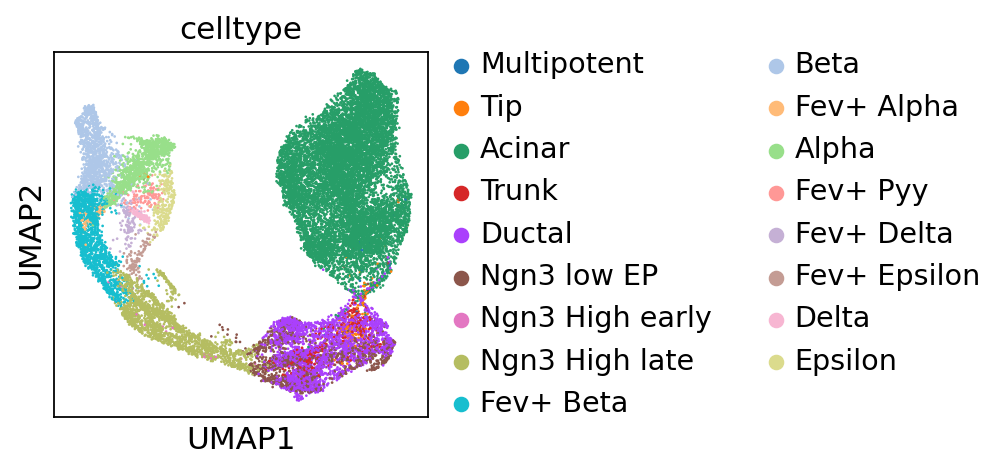

In [6]:
sc.pl.umap(adata, color='celltype')

/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


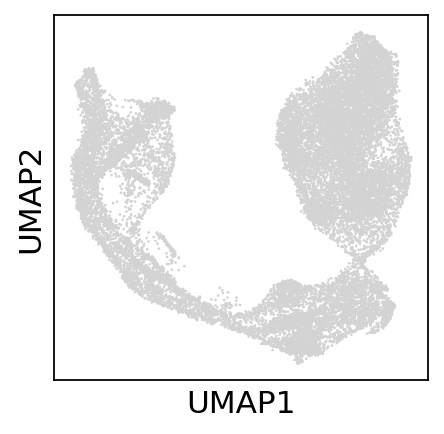

In [21]:
sc.pl.umap(adata)

/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/scCFM/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


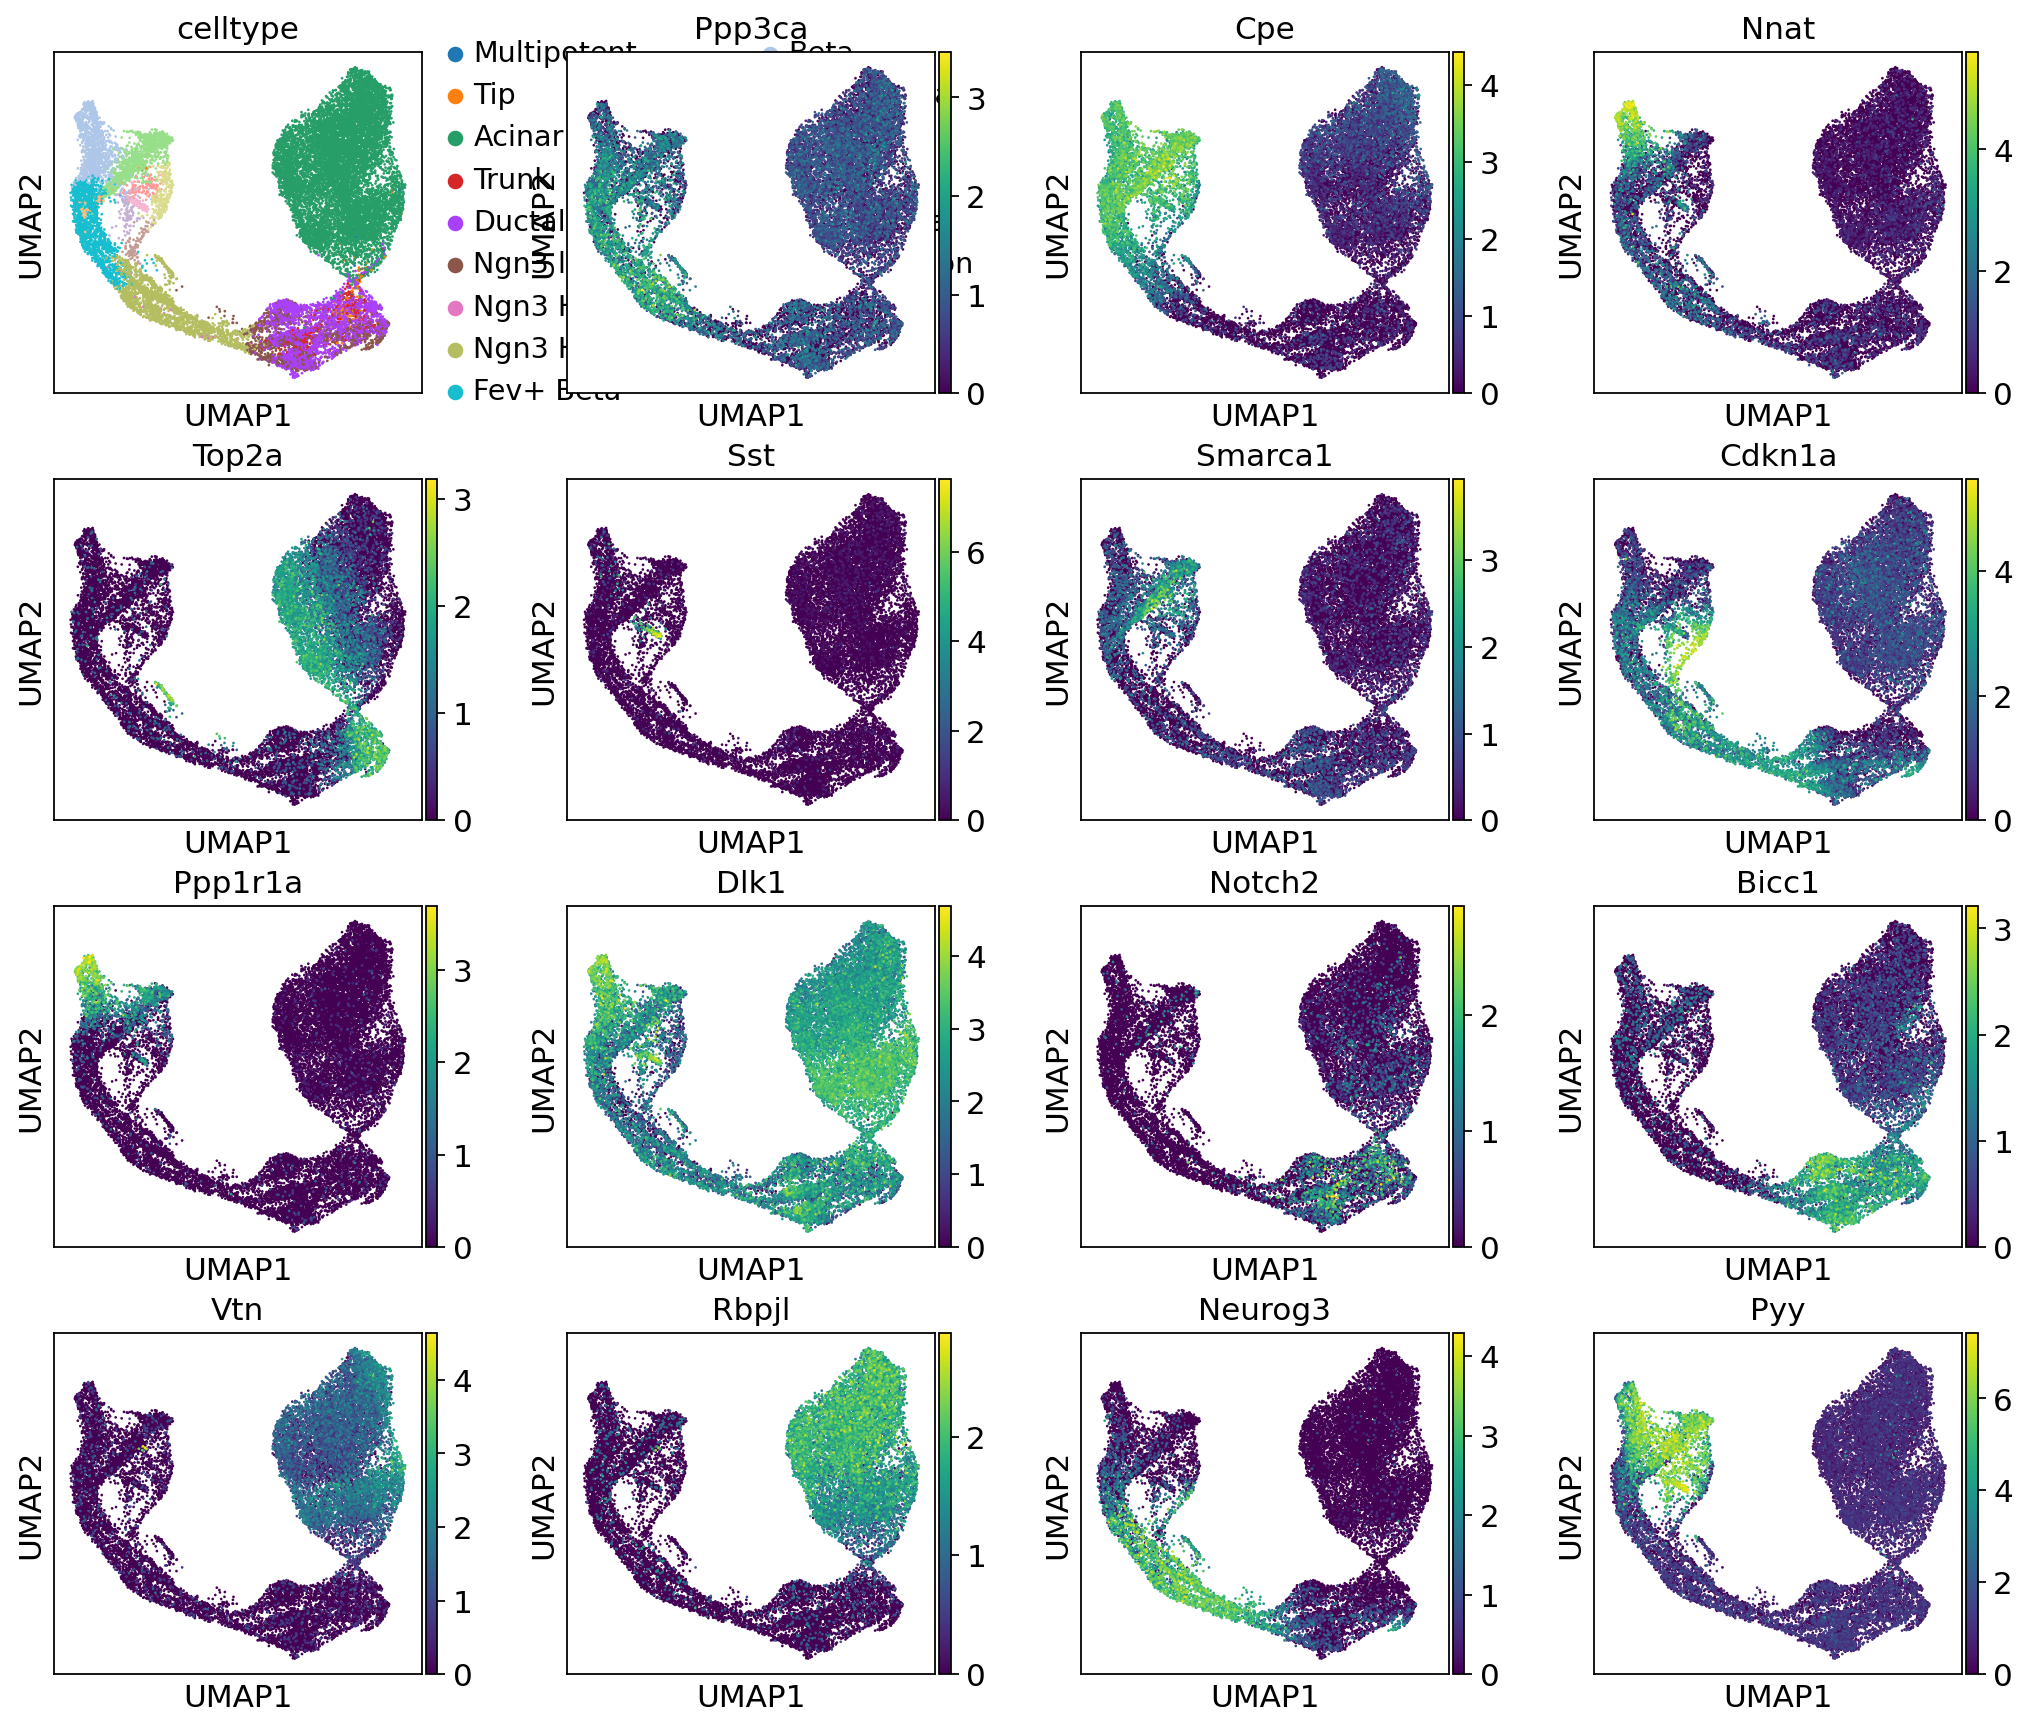

In [17]:
sc.pl.umap(adata, color=["celltype",'Ppp3ca', 
                         'Cpe',
                         'Nnat',
                         'Top2a',
                         'Sst',
                         'Smarca1',
                         'Cdkn1a',
                         'Ppp1r1a',
                         'Dlk1',
                         'Notch2',
                         'Bicc1',
                         'Vtn',
                         'Rbpjl', 
                         'Neurog3',
                         'Pyy'
                        ]
                         )

## DPT

In [54]:
sc.tl.diffmap(adata)
adata.uns['iroot'] = np.flatnonzero(adata.obs['celltype'] == 'Multipotent')[5]
# Compute DPT
sc.tl.dpt(adata, n_branchings=0)

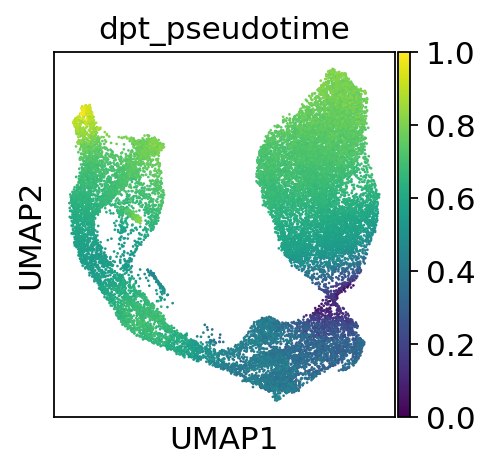

In [55]:
sc.pl.umap(adata, color="dpt_pseudotime")

In [69]:
root_cell = np.flatnonzero(adata.obs['celltype'] == 'Multipotent')[5]

In [70]:
adata.obs.iloc[root_cell]

day                                 14.5
n_counts                     9635.220703
log_counts                      8.531096
n_genes                             1904
mt_frac                         0.050296
proliferation                Non-Cycling
G2M_score                       -0.23925
S_score                        -0.063697
clusters_fig3_final          Multipotent
clusters_fig3_final_noep     Multipotent
clusters_fig4_final             Excluded
clusters_fig2_final          Multipotent
clusters_fig6_broad_final    Multipotent
clusters_fig6_fine_final     Multipotent
clusters_fig6_alpha_final    Multipotent
celltype                     Multipotent
initial_size_unspliced               566
initial_size_spliced                3715
initial_size                        3715
experimental_time                    0.0
dpt_pseudotime                       0.0
Name: CCGTTCAAGTTAAGTG-1-2, dtype: object

/home/icb/alessandro.palma/miniconda3/envs/flatvi_baselines_env/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/icb/alessandro.palma/miniconda3/envs/flatvi_baselines_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/icb/alessandro.palma/miniconda3/envs/flatvi_baselines_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

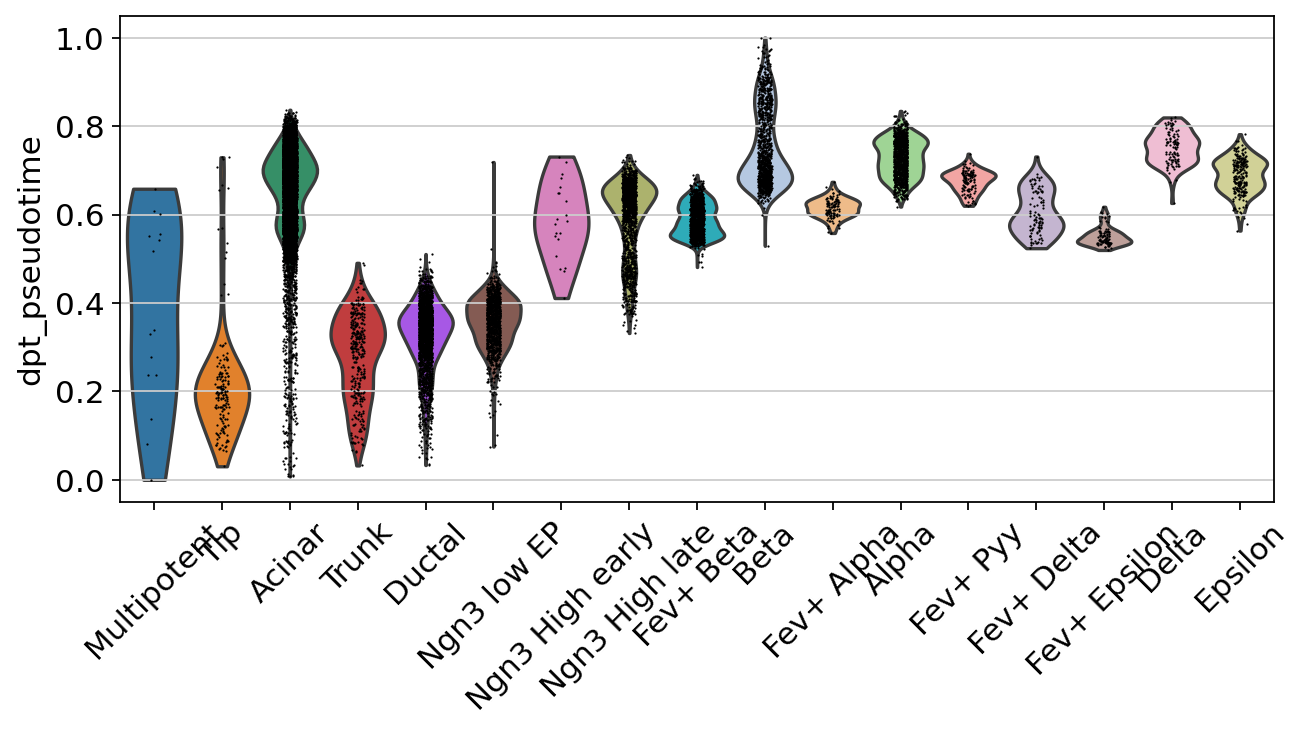

In [77]:
sc.set_figure_params(figsize=(8, 4))
sc.pl.violin(
    adata,
    keys=["dpt_pseudotime"],
    groupby="celltype",
    rotation=45
)

## PAGA

In [79]:
sc.tl.leiden(adata)

/home/icb/alessandro.palma/miniconda3/envs/flatvi_baselines_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/alessandro.palma/miniconda3/envs/flatvi_baselines_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


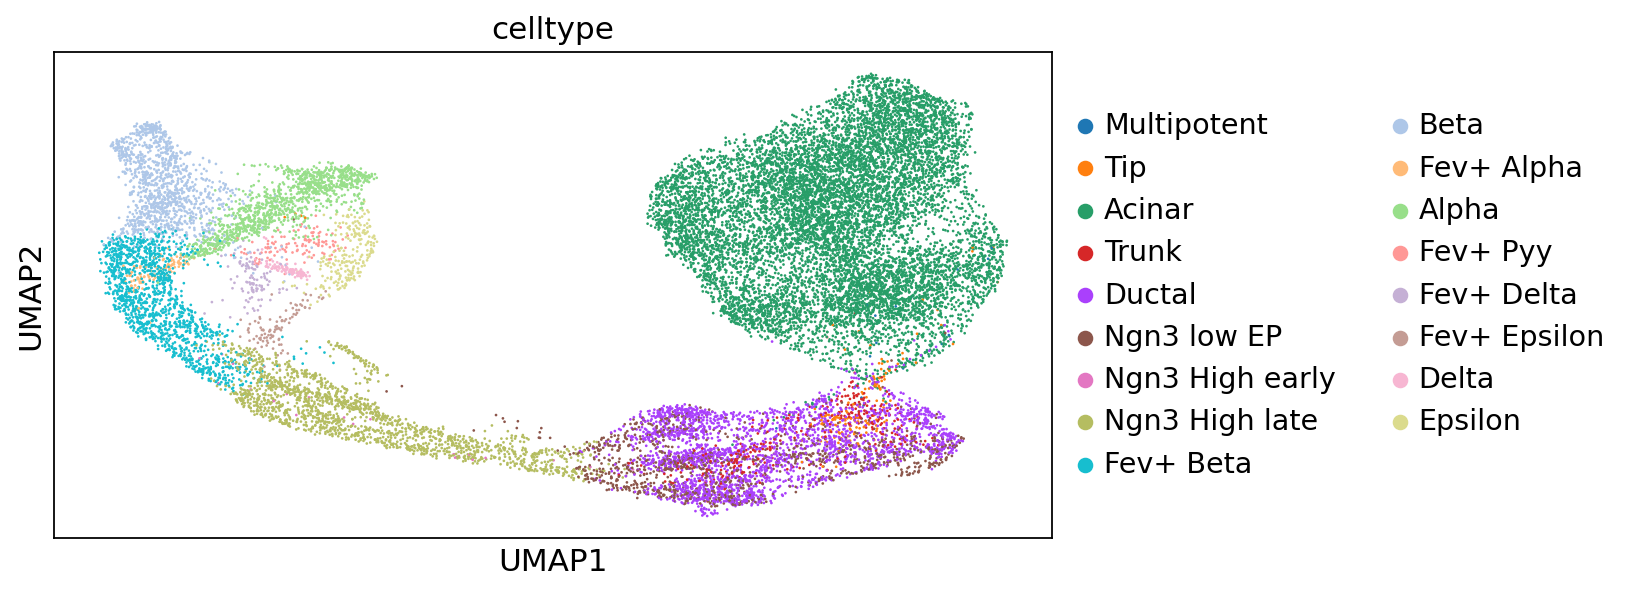

In [85]:
sc.pl.umap(adata, color="celltype")

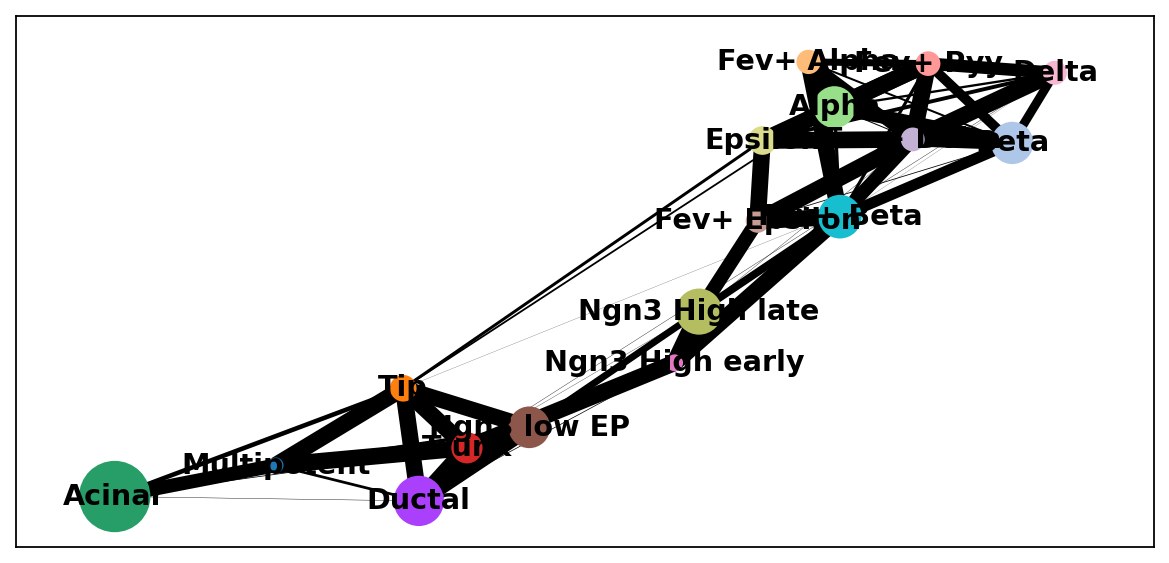

In [89]:
sc.pl.paga(adata, color=["celltype"])

# Let's get cell type centroids to interpolate

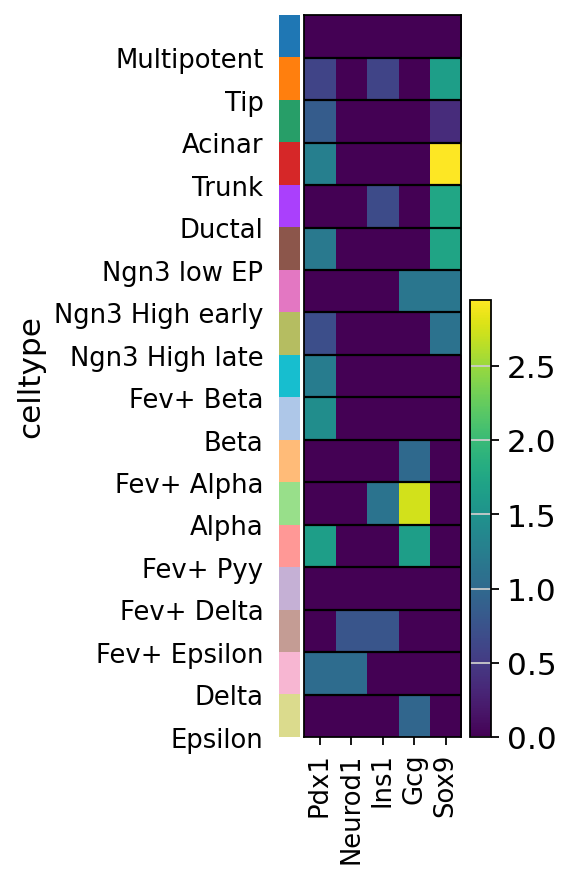

In [104]:
sc.set_figure_params(figsize=(8, 8))
# Dictionary to store median cells
median_cells = {}

for celltype in np.unique(adata.obs.celltype):
    # Get DPT values for this cell type
    pt_adata_ct = adata.obs.loc[adata.obs.celltype == celltype, "dpt_pseudotime"]
    
    # Find the index of the median cell
    median_idx = np.abs(pt_adata_ct - pt_adata_ct.median()).idxmin()
    
    # Store the cell index
    median_cells[celltype] = median_idx

# Create a new AnnData object with only the median cells
adata_medians = adata[adata.obs.index.isin(median_cells.values())]

# Define marker genes (modify as needed)
marker_genes = ["Pdx1", "Neurod1", "Ins1", "Gcg", "Sox9"]  # Example markers

# Plot marker gene expression in median cells
sc.pl.heatmap(
    adata_medians, 
    var_names=marker_genes, 
    groupby="celltype", 
    cmap="viridis"
)

plt.show()